In [1]:
import numpy as np
from matplotlib.patches import Ellipse

def plot_ellipse(ax, mu, Sigma, n_std_tau):
    ee, V = np.linalg.eigh(Sigma)
    e_big = ee[1]
    e_small = ee[0]
    v_big = V[:, 1]
    theta = np.arctan(v_big[1] / v_big[0]) * 180. / np.pi

    long_length = n_std_tau * 2. * np.sqrt(e_big)
    short_length = n_std_tau * 2. * np.sqrt(e_small)

    ellipse = Ellipse(mu, width=long_length, height=short_length, angle=theta, facecolor='none', edgecolor='k')
    ax.add_artist(ellipse)

# Test

In [2]:
import matplotlib.pyplot as plt
import scipy.linalg as sla

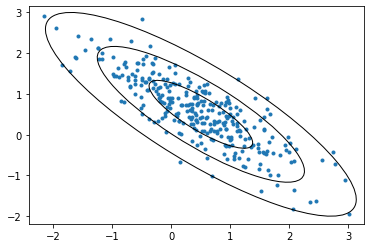

In [3]:
mu = np.array([0.5,0.5])

U, ss, _ = np.linalg.svd(np.random.randn(2,2))
Sigma = np.dot(U, np.dot(np.diag(ss), U.T))

L = sla.cholesky(Sigma, lower=True)
pp = mu.reshape((2,-1)) + np.dot(L, np.random.randn(2,300))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(pp[0,:], pp[1,:], marker='.')
plot_ellipse(ax, mu, Sigma, 1)
plot_ellipse(ax, mu, Sigma, 2)
plot_ellipse(ax, mu, Sigma, 3)